# Gradient Descent with Python

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Gradient Descent Intuition

Define a loss function (cost function)

In [4]:
def loss(resid):
  return np.power(resid,2) # squared error

Plot the cost function for demonstration purposes with sample data

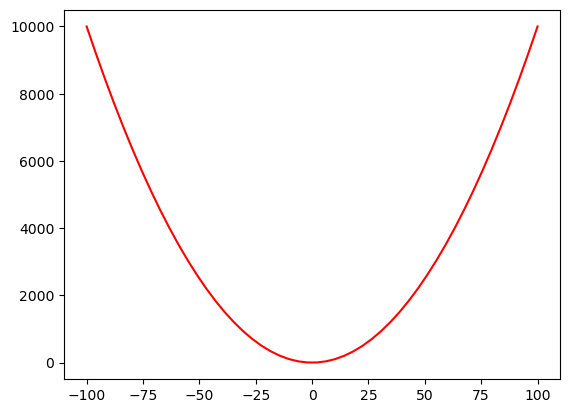

In [5]:
y = np.linspace(-100, 100, 50) # dummy data for y and y_hat
y_hat = y + y*np.random.randint(-1, 1)
residuals = y_hat - y
plt.plot(residuals, loss(residuals), 'r');

You can see that this cost function has one minimum: When the residuals are 0, the cost function is also 0.

If this were the cost function for a regression model, our goal would be to estimate the parameters for b0, b1, etc., so that the residuals become 0. In OLS, we can calculate these parameters directly.

But how do we get these parameters if we cannot calculate them directly because the function is too complex or the data set is too large?

This is exactly where gradient descent helps us!

### Batch Gradient descent

Before we apply gradient descent to regression problems, let's try it out in a simple setting 

Suppose our goal is to find the minimum of a loss function given some initial value for a residual.

In [6]:
def gradient_descent(gradient, start, learn_rate, n_iter=50):
  # gradient... function that calculates the gradient for the current observation.
  # start... initial value to start with on loss function
  # learn_rate... defines the step size
  # n_iter... maximum number of times we want to iterate (taking steps)
  
  plot_points = [start] # for demonstration purposes
  
  # Set start value
  b = start

  # Gradient descent loop
  for _ in range(n_iter):

    # Calculate next step size using learning rate and currently observed gradient
    step_size = -learn_rate * gradient(b)
    
    # Add step size to observed point and continue loop
    b += step_size

    # Collect values for b for plotting (demo purposes)
    plot_points.append(b)
  
  return b, plot_points

Define the function which calculates the gradients.

The gradient (derivative) of our loss function `residual**2` is `2*residual`

In [7]:
def gradient(resid):
  return 2*resid

Run the Gradient Descent algorithm to find the minimum of the loss function.

In [8]:
b, points = gradient_descent(gradient=gradient, start=100.0, learn_rate=0.1)

Check the result for `b`


In [9]:
b

0.0014272476927059603

Indeed, very close to zero!

See how the algorithm worked (plot the individual points that it stepped through):

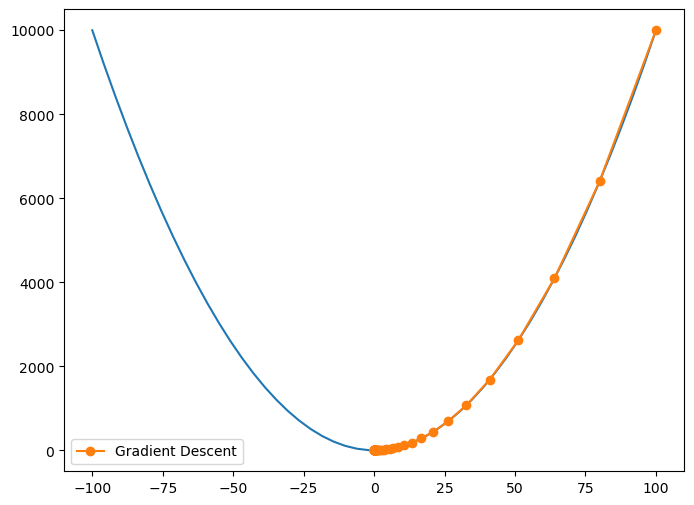

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(residuals, loss(residuals), '-')
ax.plot(points, loss(points), 'o-', label="Gradient Descent")
ax.legend(loc='best');

See how the steps get smaller the closer the gradient gets to the minimum (Why? Learning rate stays the same, but derivates become smaller)

### Learning rate impact

Let's see what happens if we increase the learning rate...

0.001427247692705966


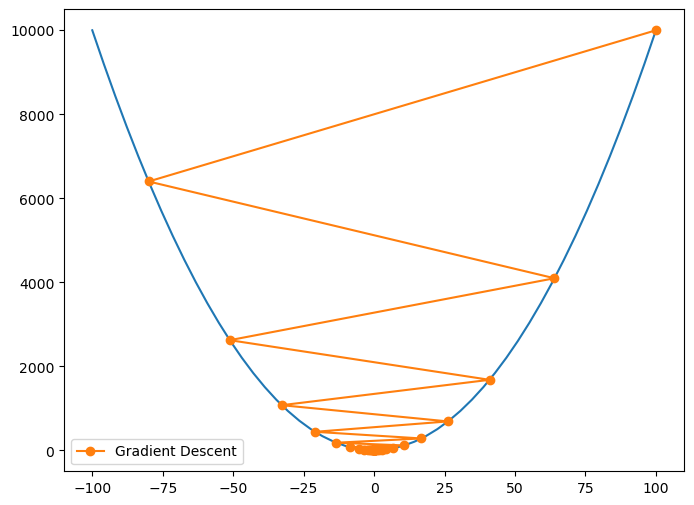

In [11]:
b, points = gradient_descent(gradient=gradient, start=100, learn_rate=0.9)
print(b)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(residuals, loss(residuals), '-')
ax.plot(points, loss(points), 'o-', label="Gradient Descent")
ax.legend(loc='best');

The gradient will still find the minimum in this case, but it takes longer. 

If the learning rate is too big, it might even be that the algorithm does not converge at all.

Learning rate too small

36.41696800871172


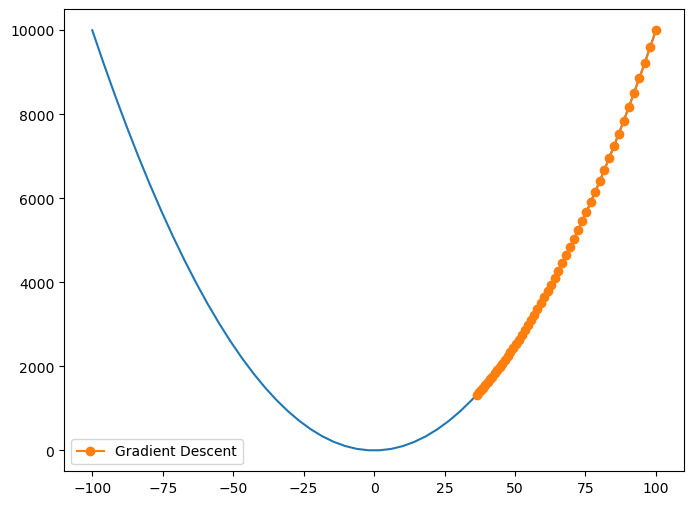

In [12]:
v, points = gradient_descent(gradient=gradient, start=100, n_iter=50, learn_rate=0.01)
print(v)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(residuals, loss(residuals), '-')
ax.plot(points, loss(points), 'o-', label="Gradient Descent")
ax.legend(loc='best');

You can see that the algorithms descends into the right direction, but it did not reach the minimum because it reached the final number of iterations before.

## Estimating (regression) parameters using Gradient Descent

**Goal:** Estimate parameters of a regression model:

`residuals` = `y_hat - y` = `b0 + b1 * x - y`

**Solution:**

Let gradient descent algorithm find the parameters

* `b0` for the intercept to start with
* `b1` for the slope value to start with
* `x` for some observed values of x
* `y` for the true values of the outcome variable

With these values we can use Gradient Descent to find the best parameters for `b0` and `b1`.

### Gradient Descent for simple linear regression ( 1-dimensional input vector)

We can define the Gradient Descent function as follows:

In [13]:
def gradient_descent(gradient, x, y, start_params, learn_rate, n_iter=50):
  # gradient... function that calculates the gradient for the current observation.
  # x... 1-dimensional array of values of the input variable
  # y... 1-dimensional array of values for the outcome variable
  # start_params... an array of two values for the intercept and slope
  # learn_rate... defines the step size
  # n_iter... maximum number of times we want to iterate (taking steps)

  # start with random value for intercept and slope
  b = start_params[0]
  w = start_params[1]

  # Gradient descent loop
  for _ in range(n_iter):

    # Calculate predicted values for y given the current parameters
    y_hat = b + w * x

    # Calculate the step size using learning rate and gradient
    db, dw = gradient(x, y, y_hat)

    # Update parameters  
    b -= learn_rate*db
    w -= learn_rate*dw
  return b,w

### Function to calculate the gradient

We can calculate the gradients for an observation (x, y) and their predicted value (x, y_hat) using the partial derivatives of the loss function.

In this case our gradient function returns two gradients (derivatives) - one for the intercept and one for the slope.

In [15]:
def gradient_mse(x, y, y_hat):
    res =  y_hat - y
    gradient_b0 = res.mean()
    gradient_b1 = (res * x).mean()
    return gradient_b0, gradient_b1

Let's plug in some numbers to see this in action!

Gradient function... `gradient_rss`
start_params... `[0.5, 0.5]` (can be anything)


In [16]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

gradient_descent(gradient_mse, x, y, start_params=[0.5, 0.5], n_iter = 50000, learn_rate=0.0015)

(5.633333278196915, 0.5400000013883347)

You can see that Gradient Descent calculated two estimated parameters  for the optimum of the intercept and the slope.

Are these correct?

We know that we could solve this simply regression directly using OLS. 

Let's compare the results:

In [17]:
X = sm.add_constant(x)
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Fri, 29 Mar 2024   Prob (F-statistic):             0.0337
Time:                        14:43:35   Log-Likelihood:                -19.071
No. Observations:                   6   AIC:                             42.14
Df Residuals:                       4   BIC:                             41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6333      5.872      0.959      0.3

c:\Users\Rina\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Voilà - Gradient Descent returned the same parameters for the intercept and the slope as OLS.

Let's take a look at another, more complex example.

## Logistic Regression / x n-dimensional

This time we want to use Gradient Descent to find the best parameters for a logistic regression model with two input features.

First, let's get some sample data:

In [18]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.24, random_state = 123)

You can see that we have two features here:

In [19]:
X[:10]

array([[ 0.98374409,  0.29124036],
       [ 0.99440139, -0.72199658],
       [ 0.95299421, -0.1370648 ],
       [-0.31932878,  0.94468081],
       [ 0.1266951 , -0.62570906],
       [ 1.30125697, -0.16532856],
       [ 1.34768434,  0.50886218],
       [-0.07554196,  0.23938342],
       [ 1.22899247, -0.70541817],
       [ 1.46820207,  0.29312048]])

And an outcome variable which can be either 0 or 1:

In [20]:
y[:10]

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

Let's define the functions we needed:

In [21]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [22]:
def gradients_log(X, y, y_hat):
    m = X.shape[0] #m...training examples.
    db = (1/m)*np.sum((y_hat - y)) # Bias gradient
    dw = (1/m)*np.dot(X.T, (y_hat - y)) # Weights gradient
    return db, dw

The Gradient Descent function looks very similar to the one above. We only had to make some modifications to account for the fact that `x` isn't a vector now, but a matrix `X`.

In [28]:
def gradient_descent(gradients, X, y, start_weights, start_bias, n_iter, learn_rate):

    # m... training examples
    # n... features
    m, n = X.shape
    
    # Transpose starting weights into same form as X
    w = np.array([start_weights]).T
    b = start_bias
    
    # Reshape y
    y = y.reshape(m,1)
    
    # Gradient descent loop
    for i in range(n_iter):
        
        # Calculating y_hat with current parameters
        y_hat = sigmoid(np.dot(X, w) + b)
        
        # Calculate gradients
        db, dw = gradients(X, y, y_hat)
        
        # Update parameters
        b -= learn_rate*db
        w -= learn_rate*dw
        
    # returning weights and bias
    return w, b

Estimate the parameters for the logistic regression model 

In [24]:
w, b = gradient_descent(gradients_log, X, y, start_weights = [0.5, 0.5], start_bias = 0, n_iter=100000, learn_rate=0.012)

Check intercept (bias):

In [25]:
b

0.14951981693757316

Check coefficents (weights):

In [26]:
w

array([[ 1.40887112],
       [-4.46164433]])

Compare to Statsmodels approach:

In [27]:
res = sm.Logit(y, sm.add_constant(X)).fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.317713
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.5416
Time:                        14:45:17   Log-Likelihood:                -31.771
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 4.956e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.414      0.362      0.718      -0.661       0.960
x1             1.4089      0.

See how Gradient Descent found the same values as the constant, x1 and x2. 

The advantage of Gradient Descent is that it works well also for very large data sets and complex loss functions.

## Stochastic Gradient Descent

In [29]:
def loss(y, y_hat):
    return -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))

In [30]:
def shuffle_data(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [31]:
def sgd(gradient, X, y, start_weights, start_bias, epochs, learn_rate, batch_size = 1):
    # batch_size... size of one batches
    # epochs... total number of iterations over the whole dataset

    # m... training examples
    # n... features
    m, n = X.shape
    
    # Transpose starting weights into same form as X
    w = np.array([start_weights]).T
    b = start_bias

    # Store losses to monitor learning process
    losses = []
    
    # Reshape y
    y = y.reshape(m,1)

    # Shuffle data
    #X, y = shuffle_data(X, y)
    
    # Gradient Descent loop
    for epoch in range(epochs):
      
      # Iterate over multiple batches
      for i in range((m-1)//batch_size + 1):
          
          # Define current batch
          start_batch = i * batch_size
          end_batch = start_batch + batch_size
          x_batch = X[start_batch:end_batch]
          y_batch = y[start_batch:end_batch]

          # Calculating y_hat for current batch
          y_hat = sigmoid(np.dot(x_batch, w) + b)
          
          # Calculate gradients for current batch
          db, dw = gradient(x_batch, y_batch, y_hat)
          
          # Update parameters
          b -= learn_rate*db
          w -= learn_rate*dw
      
      # Keep track of losses per epoch
      losses.append(loss(y, sigmoid(np.dot(X, w) + b)))

    # returning weights, bias and losses
    return w, b, losses

In [32]:
w, b, losses = sgd(gradients_log, X, y, epochs = 1000, start_weights = [0.5, 0.5], start_bias = 0, learn_rate=0.005)

In [33]:
print(b, w)

0.14983236871960567 [[ 1.41705602]
 [-4.4438035 ]]


In [34]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.5416
Time:                        14:51:39   Log-Likelihood:                -31.771
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 4.956e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.414      0.362      0.718      -0.661       0.960
x1             1.4089      0.390      3.613      0.000       0.645       2.173
x2            -4.4617      0.995     -4.484      0.0

### Plot losses

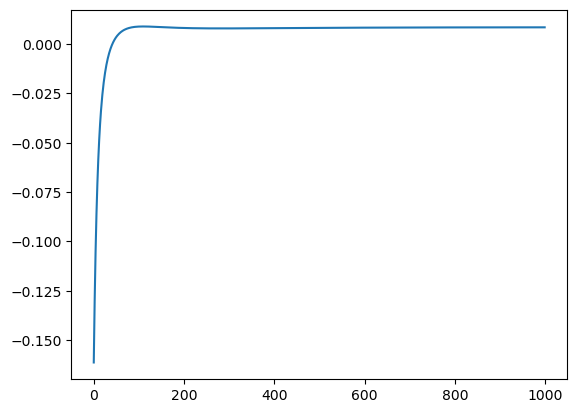

In [35]:
plt.plot(losses)

We can see that Gradient Descent quickly converged at the beginning. 

For large trainings we can monitor this loss to inspect the training progress and can stop the training if needed.

### Mini-Batch Gradient Descent

In [36]:
w, b, losses = sgd(gradients_log, X, y, batch_size = 100, epochs = 5000, start_weights = [0.5, 0.5], start_bias = 0, learn_rate=0.25)

In [37]:
print(b, w)

0.14952100159921947 [[ 1.40887174]
 [-4.46165102]]


In [38]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.5416
Time:                        14:51:54   Log-Likelihood:                -31.771
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 4.956e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1495      0.414      0.362      0.718      -0.661       0.960
x1             1.4089      0.390      3.613      0.000       0.645       2.173
x2            -4.4617      0.995     -4.484      0.0